<a href="https://colab.research.google.com/github/sonicmortis/Portfolio/blob/main/Insurance/Insurance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Data Exploration

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## 2. Load Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sonicmortis/Portfolio/refs/heads/main/Dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Checking info dataset and datatypes features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 4. Visualize distribution of numerical features

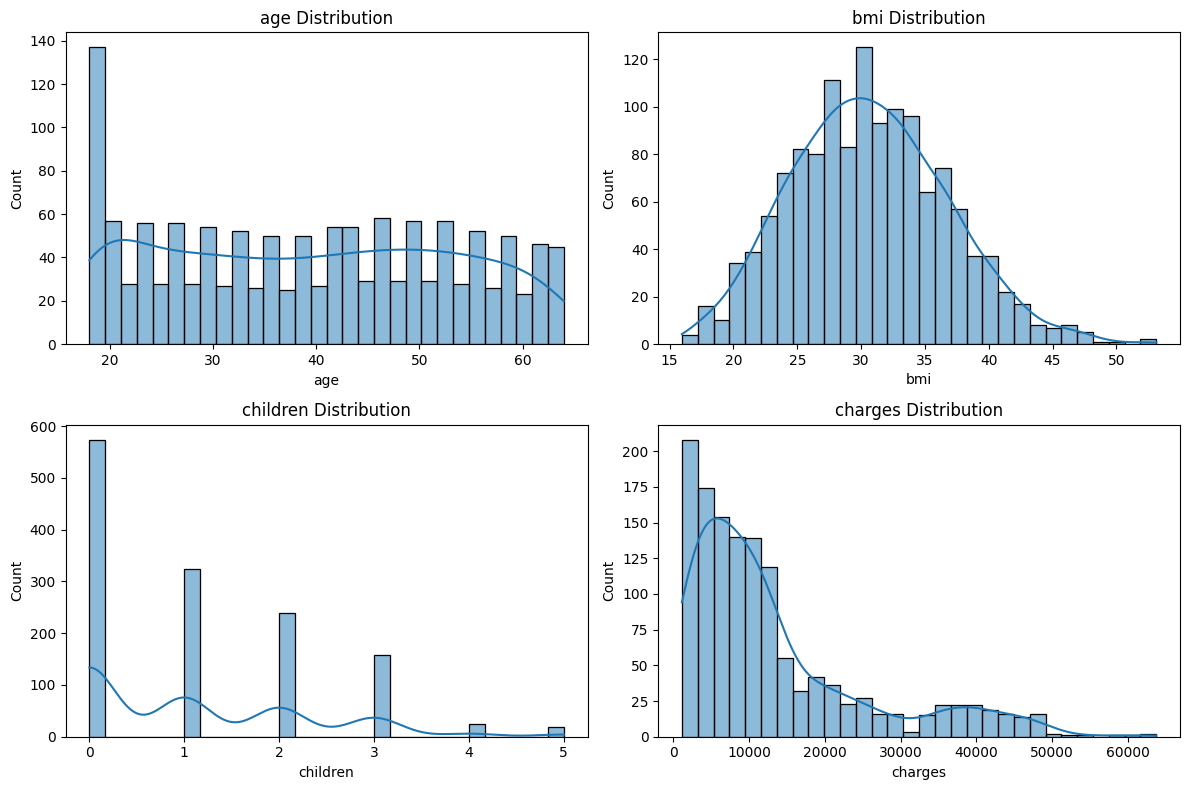

In [15]:
numerical_features = ["age", "bmi", "children", "charges"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"{feature} Distribution")

plt.tight_layout()
plt.show()

## 5. Visualize correlation between numberical features

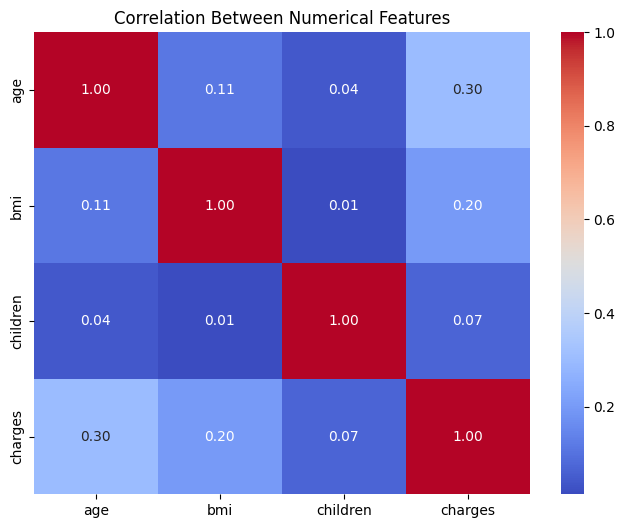

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()

In [9]:
fig = px.scatter_matrix(df, dimensions=['age', 'bmi', 'children', 'charges'], title='Scatter Matrix')
fig.show()

## 6. Exploration Data Analysis

a. ages vs charges (animations based on children)

In [8]:
fig = px.scatter(df, x='age', y='charges', animation_frame='children', title='Ages vs Insurance Charges (Animation Based on Number of Children)')
fig.show()

b. age vs charges (based on smoker)

In [10]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    size='bmi',
    hover_data=['region'],
    title='Age vs Insurance Charges',
    labels={'age': 'Age', 'charges': 'Insurance Charges'},
    template='plotly_white'
)

# Customize layout
fig.update_layout(
    title_font_size=20,
    xaxis_title='Age',
    yaxis_title='Insurance Charges',
    font=dict(family='Arial', size=12, color='black')
)

# Customize traces
fig.update_traces(
    marker=dict(size=10, line=dict(width=2, color='black'))
)
fig.show()

In [12]:
fig = px.box(df, x='sex', y='charges',
             title='Box Plot of Insurance Charges by Gender',
             color='sex',
             category_orders={"sex": ["male", "female"]},
             color_discrete_sequence=['#4169E1', 'purple'],
             )

# Display the plot
fig.show()

## Transformate categorical variables into numerical variables

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for sex and smoker
df["sex"] = df["sex"].map({"female": 0, "male": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        self.medians = X[self.columns].median()
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            X[col] = np.where((X[col] < lower_bound) | (X[col] > upper_bound), self.medians[col], X[col])
        return X

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = np.log1p(X[self.column])
        return X

# Define the pipeline
pipeline = Pipeline([
    ('outlier_handler', OutlierHandler(columns=['age', 'bmi', 'charges'])),
    ('preprocessing', ColumnTransformer([
        ('age_scaler', MinMaxScaler(), ['age']),
        ('bmi_scaler', StandardScaler(), ['bmi']),
        ('charges_transform', Pipeline([
            ('log_transform', LogTransformer(column='charges')),
            ('standard_scaler', StandardScaler())
        ]), ['charges'])
    ], remainder='passthrough'))
])

# Apply the pipeline to the dataframe
df_transformed = pipeline.fit_transform(df)

# Convert the result back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)
df_transformed.head(20)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,-0.447019,1.044812,0,0,1,southwest
1,0.0,0.548269,-1.969047,1,1,0,southeast
2,0.217391,0.417712,-0.717589,1,3,0,southeast
3,0.326087,-1.327857,1.393601,1,0,0,northwest
4,0.304348,-0.280855,-0.903029,1,0,0,northwest
5,0.282609,-0.813257,-0.941243,0,0,0,southeast
6,0.608696,0.492316,0.0968,0,1,0,southeast
7,0.413043,-0.474147,-0.066714,0,3,0,northwest
8,0.413043,-0.119778,-0.235912,1,2,0,northeast
9,0.913043,-0.796302,1.756126,0,0,0,northwest
